Przed oddaniem zadania upewnij się, że wszystko działa poprawnie.
**Uruchom ponownie kernel** (z paska menu: Kernel$\rightarrow$Restart) a następnie
**wykonaj wszystkie komórki** (z paska menu: Cell$\rightarrow$Run All).

Upewnij się, że wypełniłeś wszystkie pola `TU WPISZ KOD` lub `TU WPISZ ODPOWIEDŹ`, oraz
że podałeś swoje imię i nazwisko poniżej:


In [3]:
NAME = "Piotr Durniat"

---


# Naiwny Bayes


Model Naiwnego Bayesa jest jednym z najprostszych modeli grafowych. Zakłada on, że wszystkie obserwowane zmienne $X_1, X_2, \ldots, X_N$ są warunkowo niezależne względem zmiennej $Y$ oraz, że jedyna zależność istnieje między zmienną $Y$ a zmiennymi $\mathbf{X}$ (zobacz rysunek).


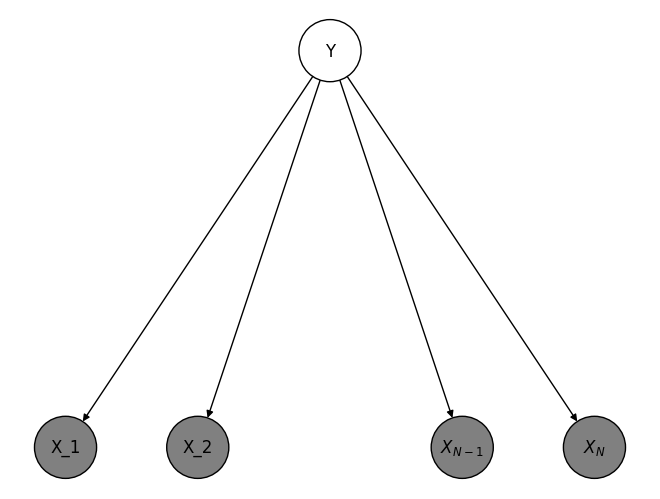

In [4]:
import networkx as nx

g = nx.DiGraph()
g.add_edges_from([("Y", "X_1"), ("Y", "X_2"), ("Y", "$X_{N-1}$"), ("Y", "$X_N$")])

nx.draw(
    g,
    with_labels=True,
    node_color=["gray" if "X" in v else "white" for v in g.nodes()],
    pos={
        "Y": (0, 0),
        "X_1": (-2, -1),
        "X_2": (-1, -1),
        "$X_{N-1}$": (1, -1),
        "$X_N$": (2, -1),
    },
    edgecolors="black",
    node_size=2000,
)

## Naiwny klasyfikator Bayesa


Naszym celem będzie rozwiązać zadanie klasyfikacji, gdzie klasa będzie reprezentowana przez zmienną $Y$ (zakładamy, że istnieje $K$ klas), natomiast atrybuty opisujące dane instancje to $X_1, X_2, \ldots, X_N$ (wartości te mogą być zarówno ciągłe, jak i dyskretne).

Dla konkretnej instancji opisanej $x_1, x_2, \ldots, x_N$ poszukujemy jej rzeczywistej klasy $\hat y$, którą uzyskujemy maksymalizując prawdopodobieństwo warunkowe klasy $y_k$ pod warunkiem danych $x_1, x_2, \ldots, x_N$:

$$\tag{1}\hat{y} = \operatorname*{argmax}_{k \in \{1, 2, \ldots, K\}} \mathbb{P}(y_k | x_1, x_2, \ldots, x_N)$$


Wykorzystując regułę Bayesa możemy to prawdopodobieństwo rozpisać jako:

$$\mathbb{P}(y_k|x_1, x_2, \ldots, x_N) = \frac{\mathbb{P}(y_k)\mathbb{P}(x_1, x_2, \ldots, x_N | y_k)}{\mathbb{P}(x_1, x_2, \ldots, x_N)}$$

Licznik tego ułamka możemy zapisać jako prawdopodbieństwo łączne:

$$\tag{2}\mathbb{P}(y_k)\mathbb{P}(x_1, x_2, \ldots, x_N | y_k) = \mathbb{P}(y_k, x_1, x_2, \ldots, x_N)$$

Dodatkowo możemy pominąć mianownik i zapisać, że prawdopodobieństwo $\text{(1)}$ jest proporcjonalne do $\text{(2)}$:

$$\mathbb{P}(y_k|x_1, x_2, \ldots, x_N) \propto \mathbb{P}(y_k, x_1, x_2, \ldots, x_N)$$

Korzystając wielokrotnie z reguły łańcuchowej możemy dokonać faktoryzacji prawdopodobieństwa łącznego:

$$
\tag{3}
\begin{align}
\mathbb{P}(y_k, x_1, x_2, \ldots, x_N) & = \mathbb{P}(x_1, x_2, \ldots, x_N, y_k)\\
& = \mathbb{P}(x_1 | x_2, \ldots, x_N, y_k)\mathbb{P}(x_2, \ldots, x_N, y_k) \\
& \ldots \\
& = \mathbb{P}(x_1 | x_2, \ldots, x_N, y_k)\mathbb{P}(x_2 | \ldots, x_N, y_k) \ldots \mathbb{P}(x_{N-1}|x_N, y_k) \mathbb{P}(x_N | y_k)\mathbb{P}(y_k)
\end{align}
$$

"Naiwność" tego modelu zakłada, że zmienne $X_1, \ldots, X_N$ są niezależne pod warunkiem $Y$, stąd:

$$\tag{4}\mathbb{P}(x_i | x_{i+1}, x_{i+2}, \ldots, x_N, y_k) = \mathbb{P}(x_i|y_k)$$

Aplikując $\text{(4)}$ do $\text{(3)}$ otrzymujemy:

$$\mathbb{P}(y_k|x_1, x_2, \ldots, x_N) \propto \mathbb{P}(y_k, x_1, x_2, \ldots, x_N) = \mathbb{P}(y_k)\mathbb{P}(x_1|y_k)\mathbb{P}(x_2|y_k)\ldots\mathbb{P}(x_N|y_k) = \mathbb{P}(y_k)\prod_{i=1}^{N}\mathbb{P}(x_i|y_k)$$

$$\mathbb{P}(y_k|x_1, x_2, \ldots, x_N) \propto \mathbb{P}(y_k)\prod_{i=1}^{N}\mathbb{P}(x_i|y_k)$$

Ostatecznie otrzymujemy:

$$\hat y = \operatorname*{argmax}_{k \in \{1, 2, \ldots, K\}} \mathbb{P}(y_k)\prod_{i=1}^{N}\mathbb{P}(x_i|y_k)$$


# Zmienne ciągłe

Będziemy się tutaj posługiwać zbiorem danych Iris, który posiada tylko ciągłe atrybuty.


In [5]:
import pandas as pd
from sklearn import datasets as sk_ds
from sklearn import model_selection as sk_ms


def load_iris_dataset():
    X, y = sk_ds.load_iris(return_X_y=True)
    X = pd.DataFrame(
        X,
        columns=[
            "sepal-length",
            "sepal-width",
            "petal-length",
            "petal-width",
        ],
    )

    X_tr, X_te, y_tr, y_te = sk_ms.train_test_split(X, y, train_size=0.8, stratify=y)
    print("Full", X.shape, y.shape)
    print("Train", X_tr.shape, y_tr.shape)
    print("Test", X_te.shape, y_te.shape)

    return {
        "train": {"X": X_tr, "y": y_tr},
        "test": {"X": X_te, "y": y_te},
    }


iris = load_iris_dataset()

Full (150, 4) (150,)
Train (120, 4) (120,)
Test (30, 4) (30,)


In [6]:
iris["train"]["X"].head()

,sepal-length,sepal-width,petal-length,petal-width
41,4.5,2.3,1.3,0.3
48,5.3,3.7,1.5,0.2
26,5.0,3.4,1.6,0.4
40,5.0,3.5,1.3,0.3
89,5.5,2.5,4.0,1.3


In [7]:
iris["train"]["y"]

array([0, 0, 0, 0, 1, 1, 2, 1, 1, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 1, 1, 1,
       1, 1, 2, 1, 0, 1, 2, 1, 2, 2, 1, 1, 0, 2, 0, 0, 2, 0, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 0, 0, 2, 1, 1, 0, 2, 1, 1, 0, 2, 0, 1, 0, 1,
       1, 0, 1, 2, 0, 0, 0, 2, 2, 0, 1, 2, 2, 2, 0, 0, 0, 1, 2, 0, 1, 0,
       1, 0, 1, 2, 0, 2, 1, 1, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2, 1, 1, 0, 0,
       2, 2, 0, 2, 2, 2, 0, 2, 2, 2])

### Implementacja w bibliotece `scikit-learn`

Załóżmy, że wszystkie zmienne tutaj pochodzą z rozkładu normalnego - użyjemy klasy `GaussianNB` (model naiwnego Bayesa z rozkładami normalnymi)


In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics as sk_mtr


clf_scikit = GaussianNB()
clf_scikit.fit(X=iris["train"]["X"], y=iris["train"]["y"])

for split in ("train", "test"):
    print(split)
    print(
        sk_mtr.classification_report(
            y_true=iris[split]["y"],
            y_pred=clf_scikit.predict(X=iris[split]["X"]),
        )
    )

train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.93      0.93      0.93        40
           2       0.93      0.93      0.93        40

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120

test
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Implementacja w bibliotece `pyro`

Poniżej zamieszczono przykładową implementację modelu naiwnego Baysa za pomocą biblioteki Pyro. Nie będziemy wchodzić w szczegóły, ale zachęcamy aby przeanalizować krok po kroku każdą z metod.


In [9]:
from pyro.params import param_store

/home/piotr/projects/ai/pmg-l/l04-piotrdurniat/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
import pyro
from pyro import distributions as dist
import torch
from torch.distributions import constraints

pyro.enable_validation(True)


from collections import defaultdict
import matplotlib.pyplot as plt
import pyro
import torch
from tqdm.auto import tqdm


class GaussianNBClassifier:
    def __init__(self, num_epochs=500, lr=1e-2):
        self._num_epochs = num_epochs
        self._lr = lr

        self._num_cls = None

        self._c_logits = None
        self._num_probs = None

    def fit(self, X, y):
        pyro.clear_param_store()

        svi = pyro.infer.SVI(
            model=self._model,
            guide=self._guide,
            optim=pyro.optim.Adam({"lr": self._lr}),
            loss=pyro.infer.Trace_ELBO(),
        )

        with tqdm(range(self._num_epochs)) as pbar:
            for epoch in pbar:
                loss = svi.step(X, y)

                if epoch % 100 == 0:
                    print(f"Epoch: {epoch} Loss = {loss:.3f}")

    def predict(self, X):
        pred = pyro.infer.Predictive(
            model=self._model,
            guide=self._guide,
            num_samples=1,
            return_sites=("logP(c|x)",),
        )
        log_pcx = pred(X)["logP(c|x)"].detach().squeeze(0).squeeze(0)
        y_pred = torch.argmax(log_pcx, dim=-1)
        return y_pred

    def _model(self, X, y=None):
        if y is not None:  # training mode
            self._num_cls = max(y) + 1

            numerical_cols = X.columns.values

            self._init_c_logits()
            self._init_num_params(X, numerical_cols)
            self._observe_numerical_features_given_classes(X, y)
        else:
            self._get_classes_log_probs(X)

    def _guide(self, X, y=None):
        pass  # This is meant to be an empty function

    def _init_c_logits(self):
        self._c_probs = pyro.param(
            "c_probs",
            lambda: torch.ones(self._num_cls).div(self._num_cls),
            constraint=constraints.simplex,
        )

    def _init_num_params(self, X, numerical_cols):
        self._num_dists = {
            col: {
                "mu": pyro.param(f"{col}_mu", lambda: torch.zeros(self._num_cls)),
                "sigma": pyro.param(
                    f"{col}_sigma",
                    lambda: torch.ones(self._num_cls),
                    constraint=constraints.positive,
                ),
            }
            for col in numerical_cols
        }

    def _observe_numerical_features_given_classes(self, X, y):
        for c in range(self._num_cls):
            x_c = X[y == c]
            with pyro.plate(f"data-numerical-{c}", x_c.shape[0]):
                for nc, v in self._num_dists.items():
                    pyro.sample(
                        f"x_{nc}|c={c}",
                        dist.Normal(v["mu"][c], v["sigma"][c]),
                        obs=torch.tensor(x_c[nc].values),
                    )

    def _get_log_likelihood(self, X):
        log_lk = []

        for c in range(self._num_cls):
            lps = []

            lps.extend(
                [
                    dist.Normal(v["mu"][c], v["sigma"][c]).log_prob(
                        torch.tensor(X[nc].values)
                    )
                    for nc, v in self._num_dists.items()
                ]
            )

            log_lk.append(torch.stack(lps).sum(dim=0))

        return torch.stack(log_lk).t()

    def _get_classes_log_probs(self, X):

        log_lk = self._get_log_likelihood(X)

        log_pcx = pyro.deterministic("logP(c|x)", self._c_probs.log() + log_lk)

In [11]:
clf_pyro = GaussianNBClassifier(num_epochs=1000)
clf_pyro.fit(X=iris["train"]["X"], y=iris["train"]["y"])


for split in ("train", "test"):
    print(split)
    print(
        sk_mtr.classification_report(
            y_true=iris[split]["y"],
            y_pred=clf_pyro.predict(X=iris[split]["X"]),
        )
    )

  1%|          | 12/1000 [00:01<01:10, 14.02it/s]

Epoch: 0 Loss = 4275.335


 12%|█▏        | 116/1000 [00:02<00:09, 92.10it/s]

Epoch: 100 Loss = 1335.869


 22%|██▏       | 219/1000 [00:03<00:07, 99.24it/s]

Epoch: 200 Loss = 902.132


 32%|███▏      | 316/1000 [00:04<00:06, 106.21it/s]

Epoch: 300 Loss = 755.048


 42%|████▏     | 416/1000 [00:05<00:05, 107.15it/s]

Epoch: 400 Loss = 671.669


 52%|█████▏    | 517/1000 [00:06<00:04, 103.73it/s]

Epoch: 500 Loss = 592.438


 62%|██████▏   | 617/1000 [00:07<00:03, 108.36it/s]

Epoch: 600 Loss = 528.208


 72%|███████▏  | 717/1000 [00:07<00:02, 108.89it/s]

Epoch: 700 Loss = 483.032


 82%|████████▏ | 818/1000 [00:08<00:01, 110.30it/s]

Epoch: 800 Loss = 449.608


 92%|█████████▏| 918/1000 [00:09<00:00, 107.96it/s]

Epoch: 900 Loss = 418.045


100%|██████████| 1000/1000 [00:10<00:00, 94.72it/s]

train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.91      0.97      0.94        40
           2       0.97      0.90      0.94        40

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120

test
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



### Implementacja w bibliotece `pgmpy`


## Zadanie 1 (0.75 pkt)

Zaimplementuj funkcję `discretize_data`, która dokona dyskretyzacji (np. `KBinsDiscretizer`) zmiennych ciągłych w zadanym zbiorze danych. Zmienne kategoryczne/dyskretne nie powinny zostać zmienione.


In [49]:
from copy import deepcopy
from sklearn.preprocessing import KBinsDiscretizer
from typing import TypedDict
import numpy as np


class DatasetSplit(TypedDict):
    X: pd.DataFrame
    y: np.ndarray


class Dataset(TypedDict):
    train: DatasetSplit
    test: DatasetSplit


def discretize_data(dataset: Dataset, n_bins: int) -> Dataset:
    _dataset = deepcopy(dataset)

    X_train = _dataset["train"]["X"]
    X_test = _dataset["test"]["X"]

    discrete_cols = X_train.select_dtypes("category").columns.values
    continuous_cols = [c for c in X_train.columns if c not in discrete_cols]

    discretizer = KBinsDiscretizer(n_bins=n_bins, encode="ordinal", strategy="uniform")

    if continuous_cols:
        discretizer.fit(X_train[continuous_cols])

        X_train_continuous_transformed = discretizer.transform(X_train[continuous_cols])
        X_test_continuous_transformed = discretizer.transform(X_test[continuous_cols])

        X_train_continuous_transformed = pd.DataFrame(
            X_train_continuous_transformed, columns=continuous_cols, index=X_train.index
        )
        X_test_continuous_transformed = pd.DataFrame(
            X_test_continuous_transformed, columns=continuous_cols, index=X_test.index
        )

        _dataset["train"]["X"][continuous_cols] = X_train_continuous_transformed
        _dataset["test"]["X"][continuous_cols] = X_test_continuous_transformed

    return _dataset

## Zadanie 2 (0.4 pkt)

Zaimplementuj funkcję `build_model`, która zbuduje model Naiwnego Bayesa na podstawie obiektu `BayesianModel` (nie wykorzytuj klasy `NaiveBayes` z pgmpy!).


In [45]:
from pgmpy.models import BayesianModel


def build_model(dataset: Dataset) -> BayesianModel:
    features = dataset["train"]["X"]
    features = features.columns.to_list()
    model_structure = [("Y", feature) for feature in features]
    model = BayesianModel(model_structure)
    return model

## Zadanie 3 (0.5 pkt)

Zaimplementuj funkcję `fit_model`, która dopasuje parametry modelu Naiwnego Bayesa. Użyj dowolnej metody estymacji (np. Maximum Likelihood)


In [47]:
from pgmpy.estimators import BayesianEstimator


def fit_model(model: BayesianModel, training_data: DatasetSplit) -> BayesianModel:
    combined_data = training_data["X"].copy()
    combined_data["Y"] = training_data["y"]
    model.fit(combined_data, estimator=BayesianEstimator, prior_type="BDeu")

    return model

## Zadanie 4 (0.75 pkt)

Zaimplementuj funkcję `predict_pgmpy`, która zwróci predykcje modelu Naiwnego Bayesa dla zadanych danych `X`. Użyj dowolnej metody inferencji (np. Variable Elimination).


In [26]:
from pgmpy.inference import VariableElimination


def predict_pgmpy(model, X):
    y_pred = []
    inference = VariableElimination(model)

    for _, row in X.iterrows():
        evidence = row.to_dict()
        prediction = inference.map_query(variables=["Y"], evidence=evidence)
        y_pred.append(prediction["Y"])

    return y_pred

Wykorzystajmy teraz zaimplementowane funkcje, aby wyuczyć model Naiwnego Bayesa w pgmpy i sprawdźmy jakość działania modelu na zdyskretyzowanych danych.


In [50]:
iris_discrete = discretize_data(dataset=iris, n_bins=5)
clf_pgmpy = build_model(dataset=iris_discrete)
clf_pgmpy = fit_model(model=clf_pgmpy, training_data=iris_discrete["train"])


for split in ("train", "test"):
    print(split)
    print(
        sk_mtr.classification_report(
            y_true=iris_discrete[split]["y"],
            y_pred=predict_pgmpy(model=clf_pgmpy, X=iris_discrete[split]["X"]),
        )
    )

/home/piotr/projects/ai/pmg-l/l04-piotrdurniat/venv/lib/python3.12/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


<class 'pandas.core.frame.DataFrame'>
train


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimina

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.92      0.90      0.91        40
           2       0.90      0.93      0.91        40

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120

test


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



# Zmienne ciągłe i dyskretne

Wykorzystaj zbiór CMC, aby sprawdzić wszystkie modele na zbiorze z cechami dyskretnymi i ciągłymi.


In [ ]:
def load_cmc(N=-1):
    # Source: https://archive.ics.uci.edu/ml/datasets/Contraceptive+Method+Choice
    df = pd.read_csv(
        "data/cmc.data",
        names=[
            "age",  # numerical
            "w-education",  # categorical
            "h-education",  # categorical
            "num-children",  # numerical
            "w-religion",  # binary
            "w-working",  # binary
            "h-occupation",  # categorical
            "sol-index",  # categorical
            "media-exposure",  # binary
            "contraceptive-method-used",  # class
        ],
    )

    cat_cols = [
        "w-education",  # categorical
        "h-education",  # categorical
        "h-occupation",  # categorical
        "sol-index",  # categorical
    ]
    bin_cols = [
        "w-religion",  # binary
        "w-working",  # binary
        "media-exposure",  # binary
    ]

    for col in cat_cols:
        df[col] = (df[col] - 1).astype("category")

    for col in bin_cols:
        df[col] = df[col].astype("category")

    if N != -1:
        df = df.sample(
            n=N,
            weights="contraceptive-method-used",
            random_state=2020,
        )

    X = df[df.columns[:-1]]
    y = df["contraceptive-method-used"].values - 1

    X_tr, X_te, y_tr, y_te = sk_ms.train_test_split(X, y, train_size=0.8, stratify=y)
    print("Full", X.shape, y.shape)
    print("Train", X_tr.shape, y_tr.shape)
    print("Test", X_te.shape, y_te.shape)

    return {
        "train": {"X": X_tr.reset_index(drop=True), "y": y_tr},
        "test": {"X": X_te.reset_index(drop=True), "y": y_te},
    }

In [ ]:
cmc = load_cmc(N=200)

In [ ]:
cmc["train"]["X"].head()

In [ ]:
cmc["train"]["y"]

### Implementacja w `pyro`

Poprzednio użyta implementacja Naiwnego Bayesa w bibliotece Pyro nie obsługuje zmiennych dyskretnych. Poniżej zamieszczamy implementację obsługująca oba typy zmiennych. Zachęcamy do dokładniejszej analizy kodu.


In [ ]:
class FullNBClassifier(GaussianNBClassifier):
    def __init__(self, num_epochs=500, lr=1e-2):
        super().__init__(num_epochs, lr)
        self._cat_probs = None

    # fit() from base class

    # predict() from base class

    def _model(self, X, y=None):  # Override
        if y is not None:  # training mode
            self._num_cls = max(y) + 1

            categorical_cols = X.select_dtypes("category").columns.values  # Changed
            numerical_cols = [
                c for c in X.columns if c not in categorical_cols
            ]  # Changed

            self._init_c_logits()
            self._init_num_params(X, numerical_cols)
            self._init_cat_params(X, categorical_cols)  # Added

            self._observe_numerical_features_given_classes(X, y)
            self._observe_categorical_features_given_classes(X, y)  # Added
        else:
            self._get_classes_log_probs(X)

    # _guide() from base class

    # _init_c_logits() from base class

    # _init_num_params() from base class

    def _init_cat_params(self, X, categorical_cols):  # Add
        self._cat_logits = {
            col: pyro.param(
                f"{col}_logits",
                lambda: torch.ones([self._num_cls, len(X[col].cat.categories)]),
            )
            for col in categorical_cols
        }

    # _observe_numerical_features_given_classes from base class

    def _observe_categorical_features_given_classes(self, X, y):  # Add
        for c in range(self._num_cls):
            x_c = X[y == c]
            with pyro.plate(f"data-categorical-{c}", x_c.shape[0]):
                for cc, v in self._cat_logits.items():
                    pyro.sample(
                        f"x_{cc}|c={c}",
                        dist.Categorical(logits=v[c]),
                        obs=torch.tensor(x_c[cc].values),
                    )

    def _get_log_likelihood(self, X):  # Override
        log_lk = []

        for c in range(self._num_cls):
            lps = []

            lps.extend(
                [
                    dist.Normal(v["mu"][c], v["sigma"][c]).log_prob(
                        torch.tensor(X[nc].values)
                    )
                    for nc, v in self._num_dists.items()
                ]
            )

            # Added
            lps.extend(
                [
                    dist.Categorical(logits=v[c]).log_prob(torch.tensor(X[cc].values))
                    for cc, v in self._cat_logits.items()
                ]
            )
            # End Added

            log_lk.append(torch.stack(lps).sum(dim=0))

        return torch.stack(log_lk).t()

    # _get_classes_log_probs() from base class

## Zadanie 5 (0.2 + 0.2 + 0.2 pkt)

Porównaj jakość działania różnych implementacji Naiwnego Bayesa (`scikit`, `pyro` oraz `pgmpy`)


In [ ]:
# Scikit

# TU WPISZ KOD
raise NotImplementedError()

In [ ]:
# Pyro
# TU WPISZ KOD
raise NotImplementedError()

In [ ]:
# Pgmpy
# TU WPISZ KOD
raise NotImplementedError()